In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Load Decision Tree bundle (adjust path if your notebook is elsewhere)
bundle_path = "../../Results/Visualizations/knn_bundle.pkl"

with open(bundle_path, "rb") as f:
    knn_bundle = pickle.load(f)

print("Loaded bundle keys:", knn_bundle.keys())

Loaded bundle keys: dict_keys(['model_name', 'y_test', 'y_pred', 'y_proba', 'confusion_matrix', 'accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'log_loss', 'roc_auc_ovr', 'params', 'feature_names', 'X_test_sample', 'subsample_fraction', 'val_f1_p1', 'val_f1_p2', 'best_params_p1', 'best_score_p1', 'best_params_p2', 'best_score_p2', 'cv_results_p1', 'cv_results_p2', 'k_values', 'knn_p1_model', 'knn_p2_model'])


### Plot 1: Confusion Matrix (KNN)

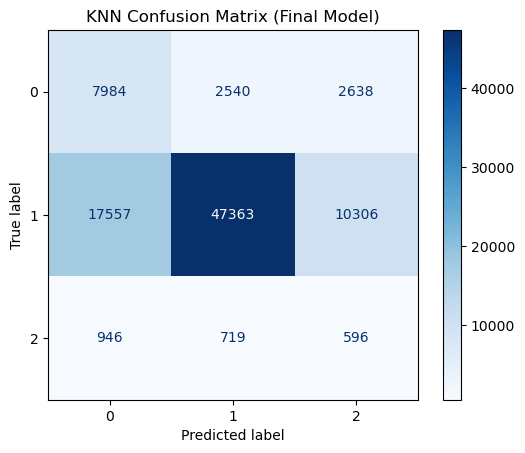

In [2]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = knn_bundle["confusion_matrix"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("KNN Confusion Matrix (Final Model)")
plt.show()

### Plot 2: ROC Curve (KNN)

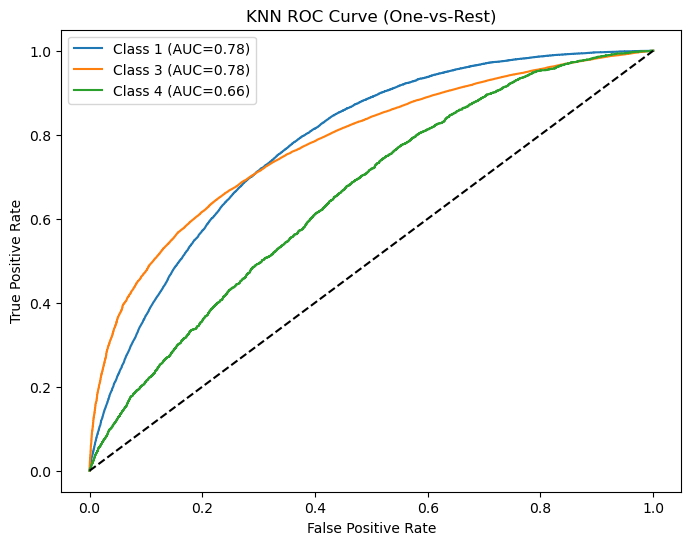

In [3]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

y_test = knn_bundle["y_test"]
y_proba = knn_bundle["y_proba"]

# Binarize
classes = np.unique(y_test)
y_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8,6))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC={roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve (One-vs-Rest)")
plt.legend()
plt.show()